In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv("Data/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [29]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [32]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [34]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(random_state=0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [36]:
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


In [37]:
import warnings
warnings.filterwarnings('ignore')

result = model.predict([[1,1,15,90]])
if result[0] == 1:
    print("Survived")
else:
    print("Not Survived")

Survived


<Axes: ylabel='count'>

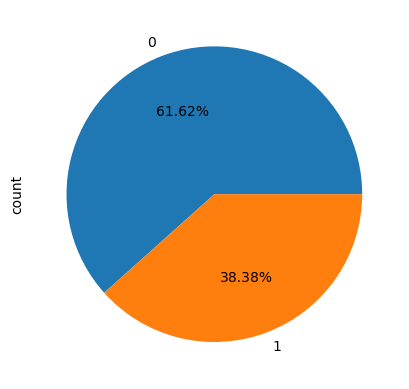

In [38]:
df["Survived"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")

<Axes: ylabel='count'>

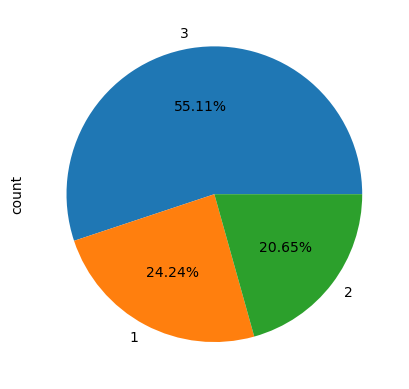

In [39]:
df["Pclass"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")

<Axes: ylabel='count'>

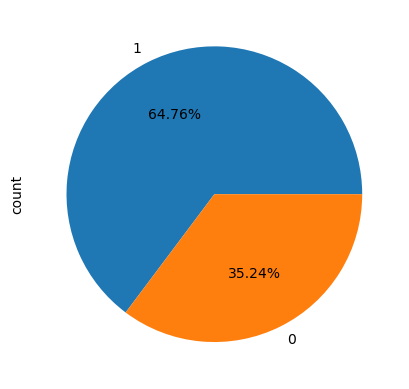

In [40]:
df["Sex"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")

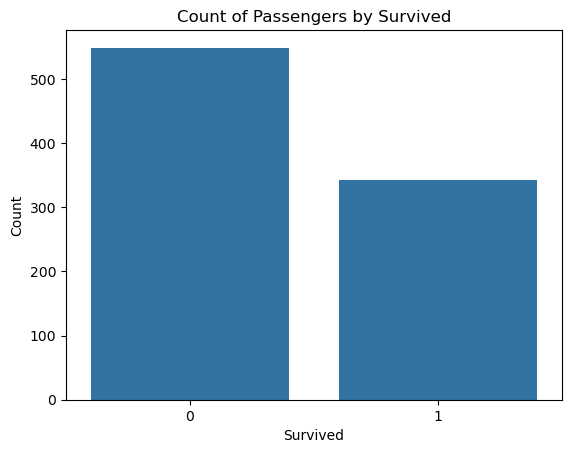

In [42]:
sns.countplot(x='Survived', data=df)
plt.title("Count of Passengers by Survived")
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

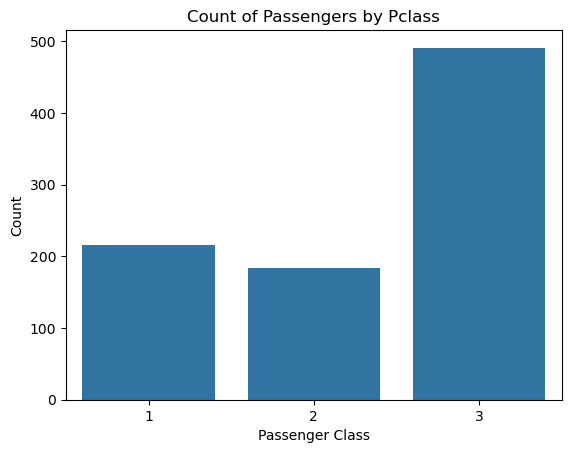

In [45]:
sns.countplot(x='Pclass', data=df)
plt.title("Count of Passengers by Pclass")
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

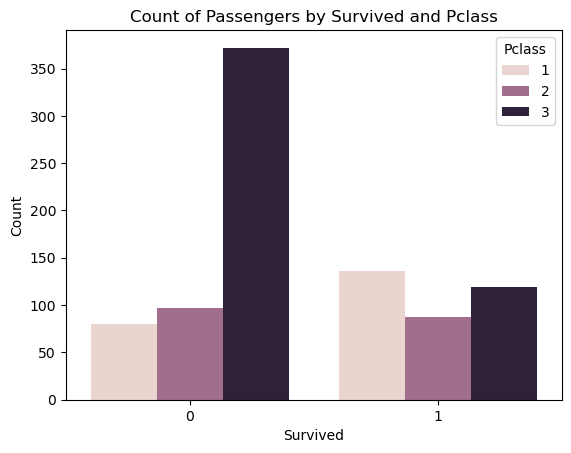

In [47]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Count of Passengers by Survived and Pclass")
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

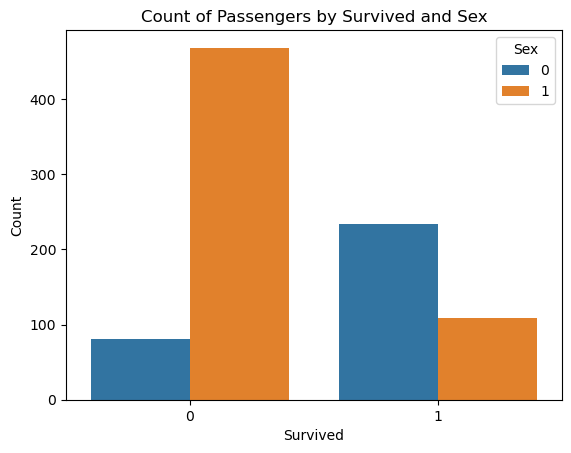

In [48]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Count of Passengers by Survived and Sex")
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Frequency')

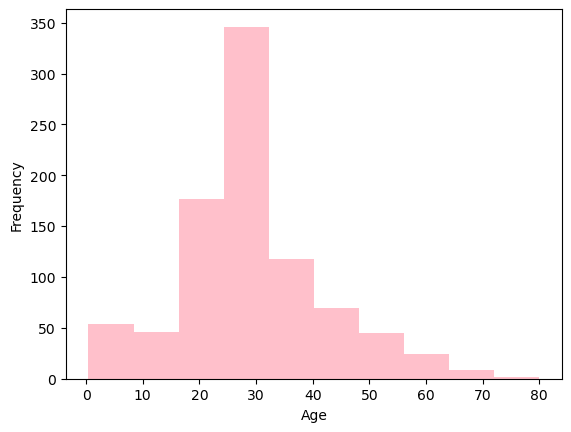

In [49]:
plt.hist(df["Age"], color = "pink")
plt.xlabel("Age")
plt.ylabel("Frequency")